In [4]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train = X[ np.arange(0, len(X), 2) ] # 偶数行: 学習データ(説明変数)
Y_train = Y[ np.arange(0, len(Y), 2) ] # 偶数行: 学習データ(目的変数: 教師ラベル)
X_test = X[ np.arange(1, len(X), 2) ] # 奇数行: テストデータ(説明変数)
Y_test = Y[ np.arange(1, len(Y), 2) ] 

from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings( 'ignore' )

In [5]:
model = MLPClassifier( hidden_layer_sizes = 10, max_iter = 100000 ) 
model.fit( X_train, Y_train )
Y_predicted = model.predict( X_test ) 
Y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn import metrics
metrics.confusion_matrix( Y_test, Y_predicted )

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  1, 24]])

In [7]:
from sklearn import metrics
metrics.confusion_matrix( Y_test, Y_predicted )

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  1, 24]])

In [8]:
Y_predicted_train = model.predict( X_train )
metrics.confusion_matrix( Y_train, Y_predicted_train ) 

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  0, 25]])

In [9]:
metrics.accuracy_score( Y_train, Y_predicted_train ) 

0.9866666666666667

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # 可視化用
model = DecisionTreeClassifier( max_depth = 3 )
model.fit( X_train, Y_train )
Y_predicted = model.predict( X_test )

In [11]:
metrics.confusion_matrix( Y_test, Y_predicted ) 

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  2, 23]])

In [12]:
metrics.accuracy_score( Y_test, Y_predicted )

0.96

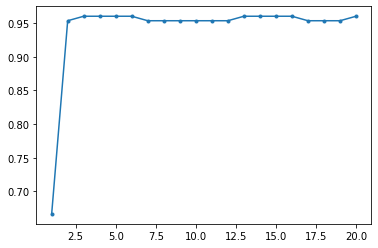

In [13]:
from sklearn.model_selection import cross_val_score
MAX_DEPTH = 20
accuracy = np.zeros( MAX_DEPTH )
for depth in range(1, MAX_DEPTH+1 ):
 model = DecisionTreeClassifier( max_depth = depth )
 scores = cross_val_score( model, X, Y, cv=10 ) # CV法による汎化精度 (trainとtestの分割不要)
 accuracy[depth-1] = np.mean( scores )
import matplotlib.pyplot as plt
plt.plot( range(1, MAX_DEPTH+1), accuracy, '.-' )